In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading our training and testing dataset

In [2]:
df_train = pd.read_csv('Absenteeism_at_work_train.csv')
df_test = pd.read_csv('Absenteeism_at_work_test.csv')

In [3]:
df_train.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90.0,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98.0,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89.0,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68.0,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90.0,172,30,2


In [4]:
df_train.shape

(666, 21)

In [5]:
df_train.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [6]:
df_train.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,665.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,664.000000,666.000000,666.000000,666.000000
mean,17.674174,19.469970,6.441441,3.893393,2.552553,222.818318,30.370871,12.699700,94.410526,0.054054,1.246246,1.028529,0.584084,0.069069,0.690691,79.210843,171.869369,26.815315,6.752252
std,11.075428,8.345175,3.573128,1.423451,1.134994,66.853234,14.905486,4.353883,3.827399,0.226294,0.617557,1.125546,0.493250,0.253762,1.175107,12.634225,5.930631,4.238081,12.666938
min,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,5.000000,1.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,7.000000,13.000000,3.000000,3.000000,2.000000,179.000000,17.000000,9.000000,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,7.000000,4.000000,2.000000,225.000000,26.000000,13.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,10.000000,5.000000,4.000000,260.000000,50.000000,16.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [7]:
df_train[df_train['Hit target'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
531,28,13,10,3,4,225,26,9,28,"284,853",...,0,1,1,0,0,2,69.0,169,24,3


##### There is 1 row in 'Hit Target' features where we have a missing value. We decided to remove that row.

In [8]:
df_train[df_train['Weight'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
500,22,23,9,6,1,179,26,9,30,"261,756",...,0,3,0,0,0,0,NaN,171,19,8
576,32,10,1,5,2,289,48,29,49,"313,532",...,0,1,0,0,0,2,NaN,172,36,8


##### There are 2 rows in 'Weight' feature and we decided to drop those rows as well.

In [9]:
df_train[df_train['Absenteeism time in hours'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours


In [10]:
df_train.shape

(666, 21)

### As we can see in the above two cells, 'Weight' and 'Hit target' features have 2 and 1 missing values respectively. Now, because there are only 3 rows in our dataset that have missing values, we can afford to drop those rows rather than impute those missing values with mean/median values. 

In [11]:
df_train.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [12]:
df_train = df_train.dropna()
df_train.shape

(663, 21)

In [13]:
df_train = df_train[df_train['Age'] != 'R']
df_train.shape

(662, 21)

##### There is a value in 'Age' feature which has a value 'R'. Guessing it was probably noise in our data, we dropped that row as well.

In [14]:
df_train['Work load Average/day '] = df_train['Work load Average/day '].str.replace(',','')
df_test['Work load Average/day '] = df_test['Work load Average/day '].str.replace(',','')

In [15]:
# Now, we have a clean data for play with...
df_train.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90.0,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98.0,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89.0,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68.0,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90.0,172,30,2


In [16]:
df_train.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90.0,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98.0,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89.0,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68.0,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90.0,172,30,2


In [17]:
df_train.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [18]:
df_train.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90.0,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98.0,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89.0,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68.0,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90.0,172,30,2


In [19]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [20]:
df_train.loc[df_train['Absenteeism time in hours'] == 0, 'hours'] = 0
df_train.loc[(df_train['Absenteeism time in hours'] > 0) & (df_train['Absenteeism time in hours'] <=6), 'hours'] = 1
df_train.loc[df_train['Absenteeism time in hours'] > 6, 'hours'] = 2

df_test.loc[df_test['Absenteeism time in hours'] == 0, 'hours'] = 0
df_test.loc[(df_test['Absenteeism time in hours'] > 0) & (df_test['Absenteeism time in hours'] <=6), 'hours'] = 1
df_test.loc[df_test['Absenteeism time in hours'] > 6, 'hours'] = 2

In [21]:
df_train['hours'].value_counts()

1.0    384
2.0    241
0.0     37
Name: hours, dtype: int64

Text(0, 0.5, 'Count')

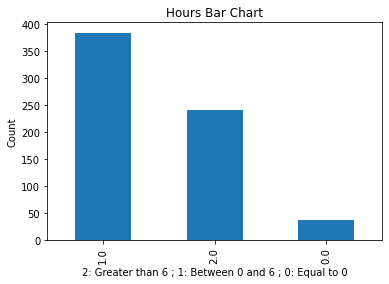

In [22]:
hours_plot = df_train.hours.value_counts().plot(kind = 'bar')
hours_plot.set_title("Hours Bar Chart")
hours_plot.set_xlabel("2: Greater than 6 ; 1: Between 0 and 6 ; 0: Equal to 0")
hours_plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

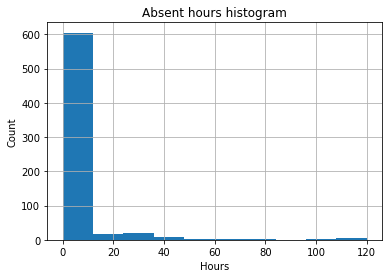

In [23]:
abs_hours_plot = df_train['Absenteeism time in hours'].hist(bins=10)
abs_hours_plot.set_title("Absent hours histogram")
abs_hours_plot.set_xlabel("Hours")
abs_hours_plot.set_ylabel("Count")

### We now have converted the values in 'Absenteeism time in hours' into categorical values in a separate column called 'hours' for easy understanding and manipulation

In [24]:
df_train.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,hours
0,11,26,7,3,1,289,36,13,33,239554,...,1,2,1,0,1,90.0,172,30,4,1.0
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,0,0,98.0,178,31,0,0.0
2,3,23,7,4,1,179,51,18,38,239554,...,1,0,1,0,0,89.0,170,31,2,1.0
3,7,7,7,5,1,279,5,14,39,239554,...,1,2,1,1,0,68.0,168,24,4,1.0
4,11,23,7,5,1,289,36,13,33,239554,...,1,2,1,0,1,90.0,172,30,2,1.0


In [25]:
df_test.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,hours
0,22,27,4,6,3,179,26,9,30,246288,...,3,0,0,0,0,56,171,19,2,1.0
1,28,19,4,2,3,225,26,9,28,246288,...,1,1,0,0,2,69,169,24,8,2.0
2,25,16,4,3,3,235,16,8,32,246288,...,3,0,0,0,0,75,178,25,3,1.0
3,22,27,4,6,3,179,26,9,30,246288,...,3,0,0,0,0,56,171,19,2,1.0
4,14,28,4,3,3,155,12,14,34,246288,...,1,2,1,0,0,95,196,25,4,1.0


In [27]:
df_train.shape

(662, 22)

In [28]:
df_test.shape

(74, 22)

In [29]:
y_train = df_train['hours']
y_test = df_test['hours']

df_train = df_train.drop(['ID', 'hours', 'Absenteeism time in hours'],axis=1)
df_test = df_test.drop(['ID', 'Absenteeism time in hours', 'hours'],axis=1)

In [30]:
df_train.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,26,7,3,1,289,36,13,33,239554,97.0,0,1,2,1,0,1,90.0,172,30
1,0,7,3,1,118,13,18,50,239554,97.0,1,1,1,1,0,0,98.0,178,31
2,23,7,4,1,179,51,18,38,239554,97.0,0,1,0,1,0,0,89.0,170,31
3,7,7,5,1,279,5,14,39,239554,97.0,0,1,2,1,1,0,68.0,168,24
4,23,7,5,1,289,36,13,33,239554,97.0,0,1,2,1,0,1,90.0,172,30


In [31]:
df_test.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,27,4,6,3,179,26,9,30,246288,91,0,3,0,0,0,0,56,171,19
1,19,4,2,3,225,26,9,28,246288,91,0,1,1,0,0,2,69,169,24
2,16,4,3,3,235,16,8,32,246288,91,0,3,0,0,0,0,75,178,25
3,27,4,6,3,179,26,9,30,246288,91,0,3,0,0,0,0,56,171,19
4,28,4,3,3,155,12,14,34,246288,91,0,1,2,1,0,0,95,196,25


### Gaussian Naive Bayes (classifier)

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 

gnb_news = GaussianNB()
gnb_news = gnb_news.fit(df_train, y_train)

## Evaluating the new model
y_predict = gnb_news.predict(df_test)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict)*100)

[[ 4  0  3]
 [ 0 25 13]
 [ 2 12 15]]
59.45945945945946


### Decision Tree Classifier

In [35]:
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
model = tree.DecisionTreeClassifier()
model = model.fit(df_train, y_train)

In [36]:
## Evaluating the new model
y_predict = model.predict(df_test)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict)*100)

[[ 7  0  0]
 [ 0 24 14]
 [ 0  6 23]]
72.97297297297297


### Random forest Classifier (Bagging)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(df_train, y_train)

## Evaluating the new model
y_predict = rf.predict(df_test)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict)*100)

[[ 4  0  3]
 [ 0 28 10]
 [ 0  8 21]]
71.62162162162163


### Gradient Boosting Classifier (Boosting)

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
class_gb = GradientBoostingClassifier(n_estimators = 130, random_state=0)

class_gb = class_gb.fit(df_train, y_train)

## Evaluating the new model
y_predict = class_gb.predict(df_test)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict)*100)

[[ 4  0  3]
 [ 0 31  7]
 [ 0  7 22]]
77.02702702702703


### Applying PCA to reduced dimensionality

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5, svd_solver='full')
df_train_pca = pca.fit_transform(df_train)

In [40]:
df_train_pca

array([[ 3.30505419e+04, -6.60901508e+01, -3.44462221e+00,
         1.26013711e+01, -7.66425598e+00],
       [ 3.30505428e+04,  1.06101826e+02,  1.49695553e+01,
         1.88609890e+01,  1.99222942e+01],
       [ 3.30505439e+04,  4.28929589e+01, -2.29590557e+01,
         6.01951413e+00,  1.15757835e+00],
       ...,
       [ 2.63165411e+04, -1.39499710e+02, -1.36282331e+01,
         3.12591230e+00, -4.60770212e+00],
       [ 2.63165426e+04,  1.05219547e+02,  1.74048881e+01,
        -3.48578014e-01,  9.17595227e+00],
       [ 2.63165416e+04, -1.09305942e+01,  1.88961828e+01,
         1.10499603e+01, -5.35559280e+00]])

In [41]:
df_test_pca = pca.fit_transform(df_test)

In [42]:
model_pca = tree.DecisionTreeClassifier()
model_pca = model_pca.fit(df_train_pca, y_train)

## Evaluating the new model
y_predict = model_pca.predict(df_test_pca)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict)*100)

[[ 0  2  5]
 [ 0 15 23]
 [ 2 18  9]]
32.432432432432435


# Extra Credit

In [43]:
df_train_copy.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90.0,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98.0,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89.0,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68.0,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90.0,172,30,2


In [44]:
df_test_copy.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,22,27,4,6,3,179,26,9,30,246288,...,0,3,0,0,0,0,56,171,19,2
1,28,19,4,2,3,225,26,9,28,246288,...,0,1,1,0,0,2,69,169,24,8
2,25,16,4,3,3,235,16,8,32,246288,...,0,3,0,0,0,0,75,178,25,3
3,22,27,4,6,3,179,26,9,30,246288,...,0,3,0,0,0,0,56,171,19,2
4,14,28,4,3,3,155,12,14,34,246288,...,0,1,2,1,0,0,95,196,25,4


In [45]:
y_train = df_train_copy['Absenteeism time in hours']
df_train_copy = df_train_copy.drop(['ID', 'Absenteeism time in hours'], axis=1)

y_test = df_test_copy['Absenteeism time in hours']
df_test_copy = df_test_copy.drop(['ID', 'Absenteeism time in hours'], axis=1)

### Random forest regressor (Bagging)

In [46]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators = 80, criterion  = "mae")

regr = regr.fit(df_train_copy, y_train)
y_predict = regr.predict(df_test_copy)

#print(accuracy_score(y_test,y_predict)*100)

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.00103395948702234

In [48]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predict)

8.196790540540539

### Decision Tree Regressor

In [49]:
from sklearn.tree import DecisionTreeRegressor
model_regr = tree.DecisionTreeRegressor()
model_regr = model_regr.fit(df_train_copy, y_train)

## Evaluating the new model
y_predict = model_regr.predict(df_test_copy)

In [50]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predict)

10.304054054054054

### Gradient Boosting Regressor (Boosting)

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
reg_gb = GradientBoostingRegressor(n_estimators = 80, loss='huber', random_state=0)

reg_gb = reg_gb.fit(df_train_copy, y_train)
## Evaluating the new model
y_predict = reg_gb.predict(df_test_copy)

In [52]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predict)

5.889764644921822